# Backtesting y Evaluación de la Estrategia

Este notebook evalúa el rendimiento de la estrategia de cruce de medias móviles (50/200) aplicada a datos históricos de BTC/USDT. Se realiza simulación de operaciones, cálculo de métricas clave y visualización de la curva de capital (equity curve) y drawdown.


##  Carga de datos

Se importa el conjunto de datos enriquecido (`btc_data_features.csv`) que contiene las columnas necesarias para aplicar la estrategia. Se convierte la columna `date` en índice de tipo datetime para facilitar el manejo temporal.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from modules.backtesting_utils import detectar_cruces, simular_operaciones, calcular_metricas

In [14]:
btc_data = pd.read_csv('btc_data_features.csv', index_col='date', parse_dates=True)

##  Configuración de la estrategia

Se establecen los parámetros de la estrategia:

- `short_window = 50`: representa la media móvil de corto plazo.
- `long_window = 200`: representa la media móvil de largo plazo.

Con estos parámetros, se utiliza la función `detectar_cruces()` para generar las señales de entrada y salida de la estrategia.


In [15]:
short_window = 50
long_window = 200

##  Simulación de operaciones

Se utiliza la función `simular_operaciones()` para identificar los trades generados por los cruces de medias móviles. Cada trade contiene:

- Fecha y precio de entrada/salida.
- Retorno porcentual por operación.

Luego se calcula el rendimiento acumulado con la función `calcular_metricas()`, que entrega un resumen estadístico y una curva de capital simulada.


In [16]:
señales = detectar_cruces(btc_data, short_window, long_window)

In [17]:
trades = simular_operaciones(señales)
resumen, trades_df = calcular_metricas(trades)

##  Visualización: Equity Curve y Drawdown

La curva de capital (Equity Curve) muestra cómo evoluciona el capital a lo largo del tiempo, partiendo desde un capital inicial ($10,000 por defecto).

El Drawdown representa las caídas relativas del capital respecto a su pico histórico, mostrando la magnitud y duración de las pérdidas.

Esta sección ayuda a evaluar la estabilidad y riesgo de la estrategia.


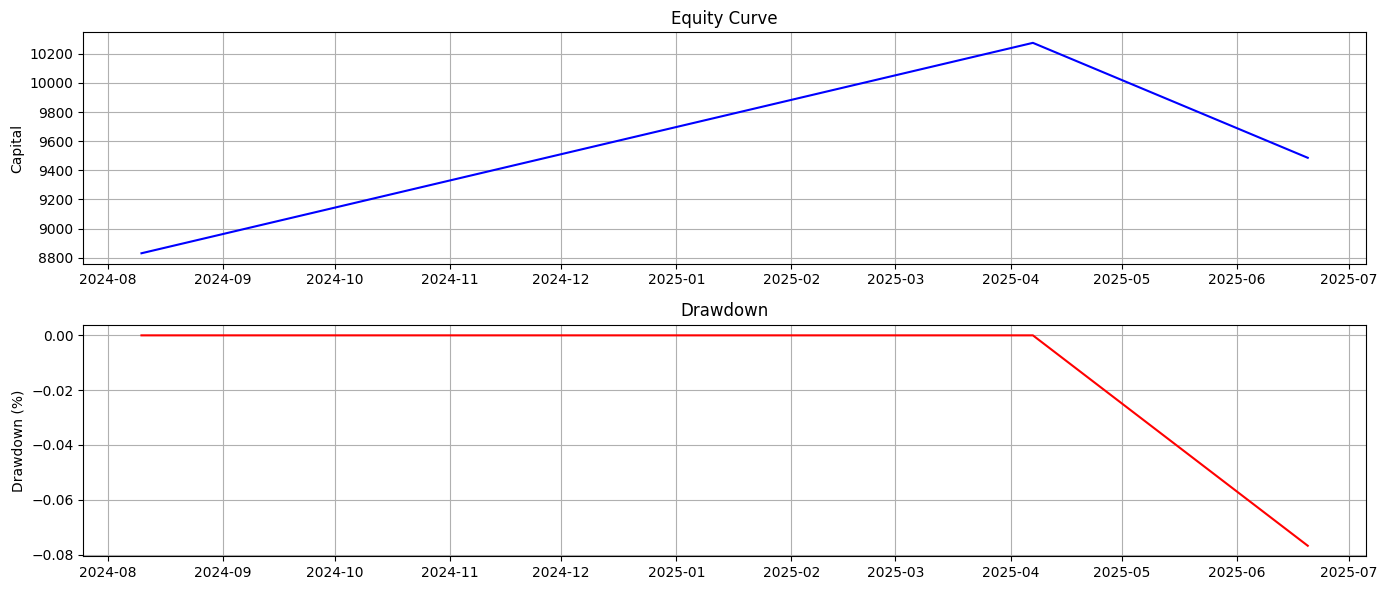

In [18]:
equity = trades_df['capital']
peak = equity.cummax()
drawdown = (equity - peak) / peak

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(trades_df['fecha_salida'], equity, label="Equity Curve", color='blue')
plt.title("Equity Curve")
plt.ylabel("Capital")
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(trades_df['fecha_salida'], drawdown, label="Drawdown", color='red')
plt.title("Drawdown")
plt.ylabel("Drawdown (%)")
plt.grid()

plt.tight_layout();

In [19]:
pd.Series(resumen)

Total Return (%)       -5.138652
CAGR (%)               -4.039314
Sharpe Ratio           -1.051660
Sortino Ratio          -5.621653
Máximo Drawdown (%)    -7.679289
Número de trades        3.000000
Win Rate (%)           33.333333
dtype: float64